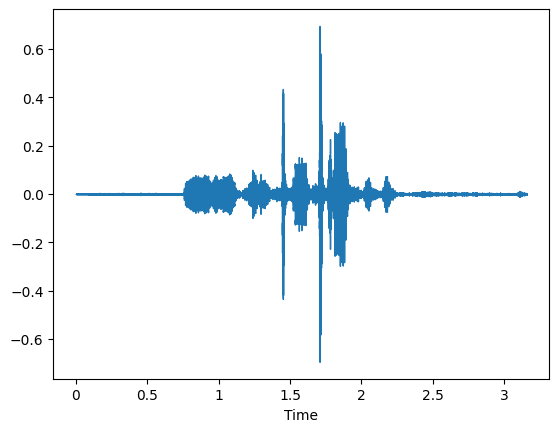

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import soundfile as sf

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

y, sr = librosa.load('/content/Lab1_voice.wav')
librosa.display.waveshow(y)

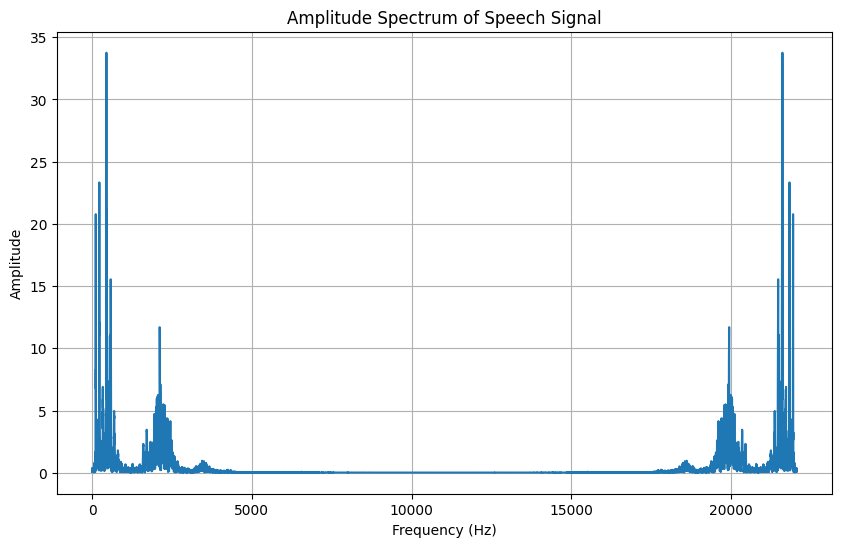

In [2]:
#Fourier Transform
speech_fft = np.fft.fft(y, sr)

# Calculate amplitude spectrum
amplitude_spectrum = np.abs(speech_fft)

# Plot amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

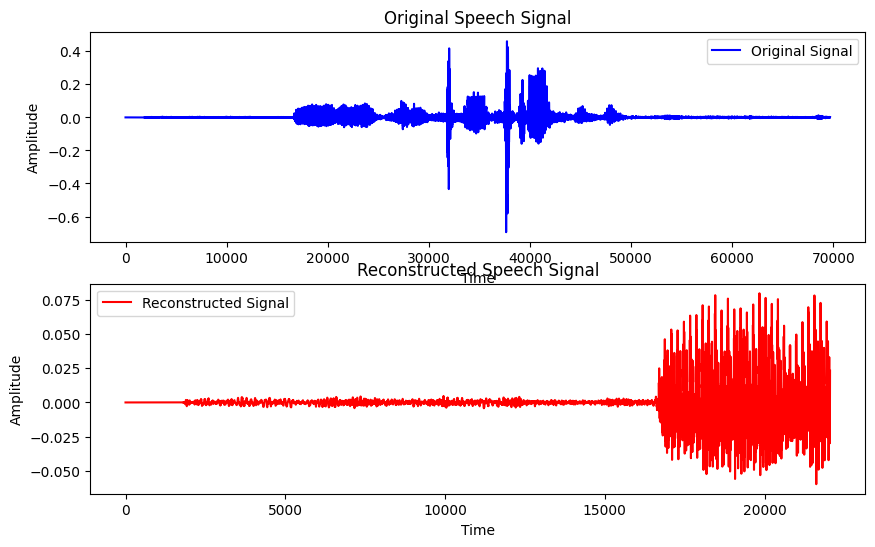

In [5]:
speech_fft = np.fft.fft(y, sr)

#Inverse Fourier Transform
reconstructed_signal = np.fft.ifft(speech_fft)
plt.figure(figsize=(10, 6))

# Plot original signal
plt.subplot(2, 1, 1)
plt.plot(y, color='blue', label='Original Signal')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot reconstructed signal
plt.subplot(2, 1, 2)
plt.plot(np.real(reconstructed_signal), color='red', label='Reconstructed Signal')
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

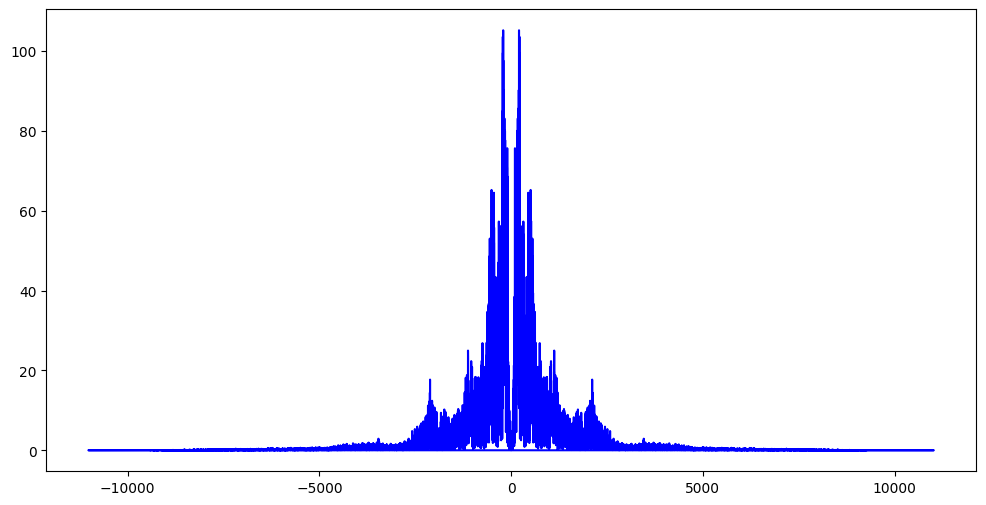

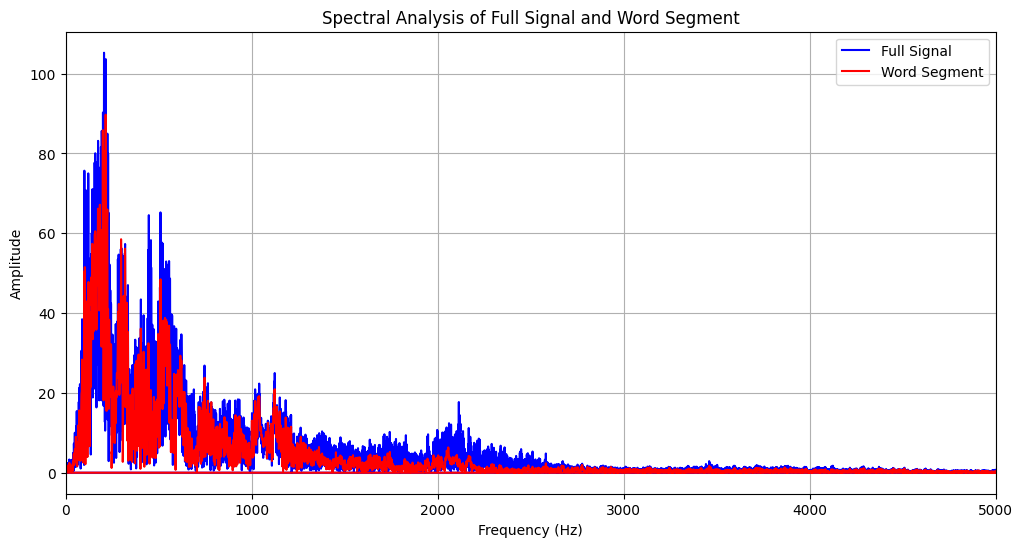

In [6]:
word_start_time = 1.5  #start time of the word
word_end_time = 2.5  # End time

word_start_sample = int(word_start_time * sr)
word_end_sample = int(word_end_time * sr)

word_segment = y[word_start_sample:word_end_sample]

full_signal_fft = np.fft.fft(y)
word_segment_fft = np.fft.fft(word_segment)

plt.figure(figsize=(12, 6))
# Calculate frequency axis
freq_axis = np.fft.fftfreq(len(y), 1/sr)

plt.plot(freq_axis, np.abs(full_signal_fft), label='Full Signal', color='blue')

plt.figure(figsize=(12, 6))
plt.plot(freq_axis, np.abs(full_signal_fft), label='Full Signal', color='blue')

# Plot amplitude spectrum of the word segment
word_freq_axis = np.fft.fftfreq(len(word_segment), 1/sr)
plt.plot(word_freq_axis, np.abs(word_segment_fft), label='Word Segment', color='red')

plt.title('Spectral Analysis of Full Signal and Word Segment')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.xlim(0, 5000)
plt.show()

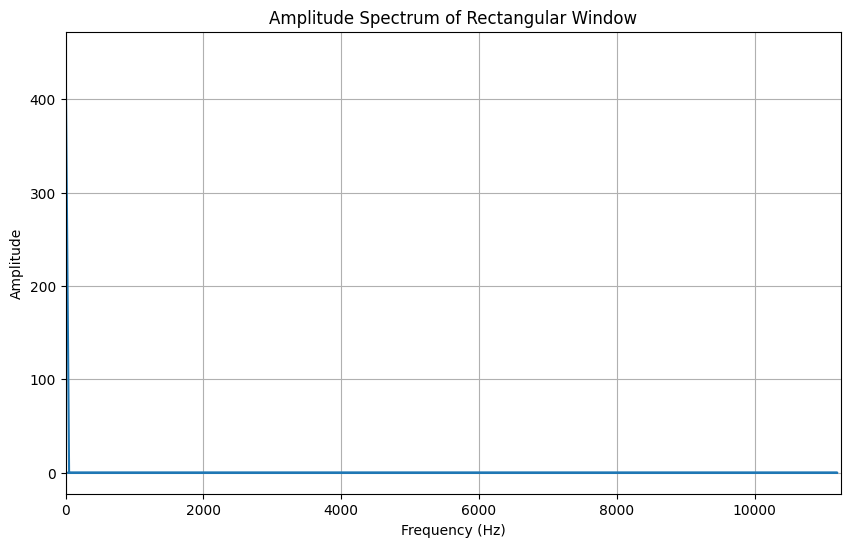

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define sampling rate and duration
fs = 22500
duration = 0.02  # Duration of the window (seconds)

# Generate time vector
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate rectangular window function
rect_window = np.ones_like(t)

# Apply FFT to the windowed signal
fft_output = np.fft.fft(rect_window)

# Calculate frequency axis
freq_axis = np.fft.fftfreq(len(rect_window), 1 / fs)

# Plot amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(freq_axis, np.abs(fft_output))
plt.title('Amplitude Spectrum of Rectangular Window')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.xlim(0, fs / 2)
plt.show()


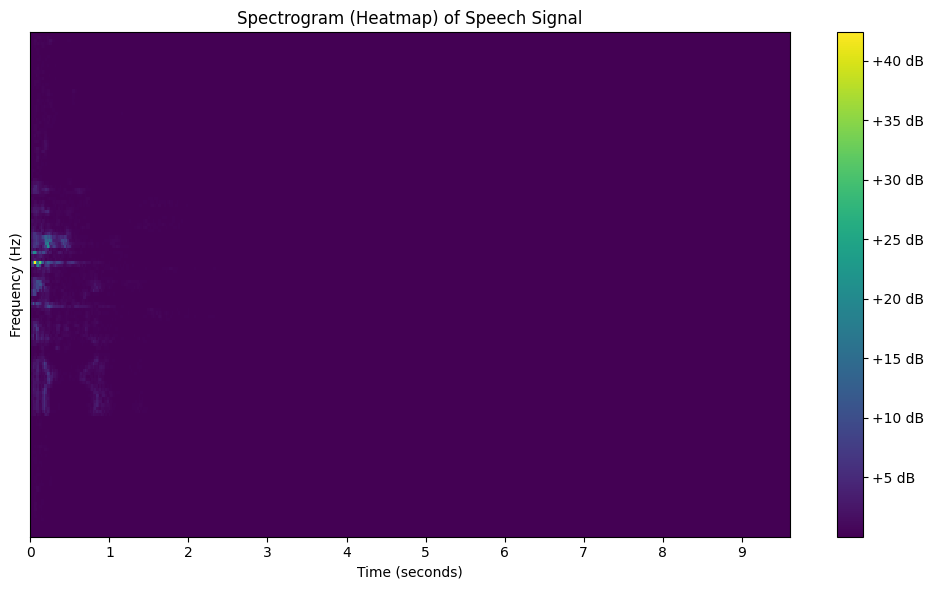

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


y, sr = librosa.load('/content/Lab1_voice.wav', sr=None)

# Define parameters
window_duration = 0.02  # 20 milliseconds
hop_length = int(sr * window_duration)  # Hop length for 20 ms intervals
n_fft = int(sr * window_duration)  # FFT size for 20 ms window

# Compute the spectrogram using librosa.stft
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Compute the magnitude spectrogram
magnitude = np.abs(D)

frequency_matrix = np.transpose(magnitude)

# Plot the matrix using a heatmap
plt.figure(figsize=(10, 6))
librosa.display.specshow(frequency_matrix, sr=sr, hop_length=hop_length, x_axis='time', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Heatmap) of Speech Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()


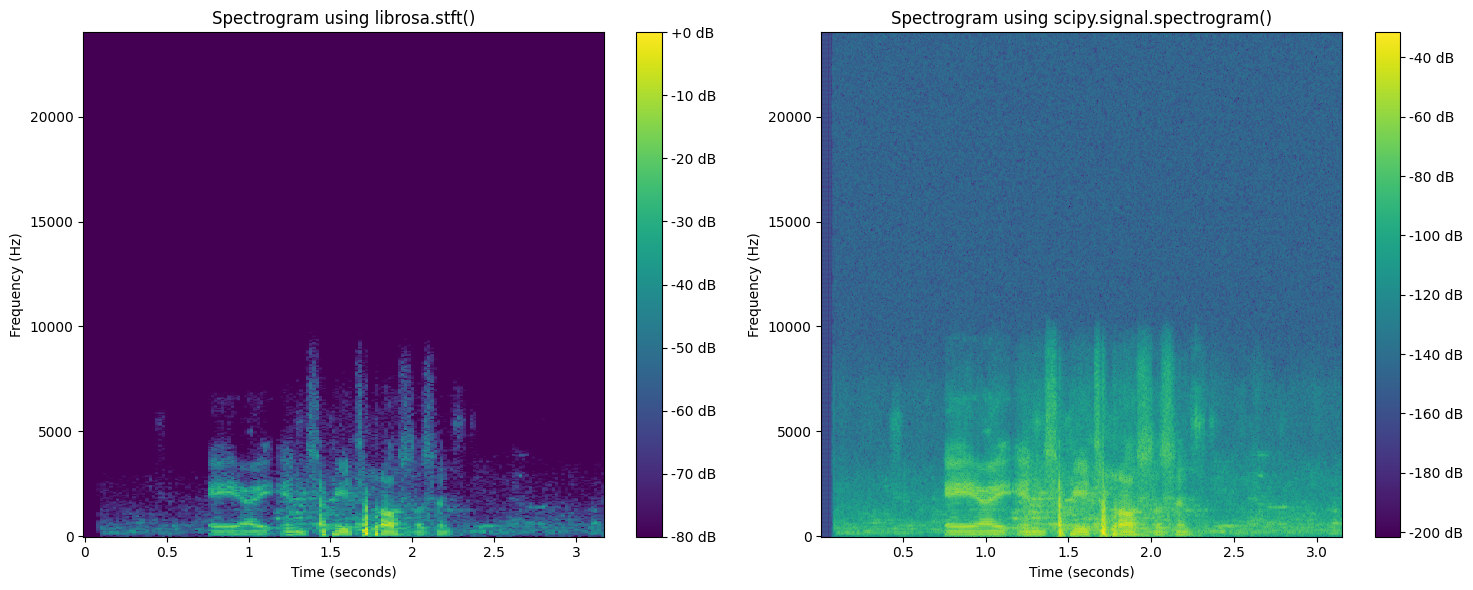

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.signal import spectrogram

y, sr = librosa.load('/content/Lab1_voice.wav', sr=None)

# Define parameters
window_duration = 0.02  # 20 milliseconds
hop_length = int(sr * window_duration)  # Hop length for 20 ms intervals
n_fft = int(sr * window_duration)  # FFT size for 20 ms window
noverlap = int(n_fft * 0.75)

# Compute the spectrogram using librosa.stft
D_librosa = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
magnitude_librosa = np.abs(D_librosa)

frequencies, times, S_scipy = spectrogram(y, fs=sr, window='hann', nperseg=n_fft, noverlap=noverlap)

# Plot the spectrograms
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
librosa.display.specshow(librosa.amplitude_to_db(magnitude_librosa, ref=np.max), sr=sr, hop_length=hop_length, x_axis='time', y_axis='linear', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram using librosa.stft()')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

# Plot the spectrogram computed using scipy.signal.spectrogram
plt.subplot(1, 2, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(S_scipy), shading='auto', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram using scipy.signal.spectrogram()')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()
